# Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_viz.csv')
data['dateSeance'] = pd.to_datetime(data['dateSeance'])
data = data.groupby('sportif').head(50)
data

,dateSeance,sportif,duree,conditions,meteo,monotonie,animationpeda,intensitemax,intensitemoy,technique,...,estimesoi,humeur,plaisir,stress,motivation,vigueur,sommeil,bienetre,recuperer,fatigue
0,2020-06-29,Sportif_10,70,1.0,1.0,1.1,1.0,5.3,4.3,4.4,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
1,2020-06-29,Sportif_12,70,3.1,1.0,3.5,3.3,1.0,2.7,3.8,...,1.0,1.0,1.0,1.0,1.0,2.6,2.9,1.8,1.0,2.6
2,2020-06-29,Sportif_13,70,1.2,1.0,2.7,1.3,1.0,4.6,4.9,...,1.0,1.0,1.0,1.0,1.0,3.8,7.6,1.0,1.0,4.1
3,2020-06-29,Sportif_14,70,1.1,1.0,3.2,1.0,1.0,2.1,2.0,...,1.0,1.0,1.0,1.0,1.0,2.0,6.3,1.0,1.0,8.6
4,2020-06-29,Sportif_15,70,1.0,1.0,4.3,1.1,4.8,4.5,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,2021-03-28,Sportif_3,45,9.9,0.0,1.0,1.0,1.6,2.6,1.7,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.8
5638,2021-03-29,Sportif_3,120,1.0,0.0,5.0,1.0,5.4,6.6,2.8,...,0.0,0.0,0.0,0.0,0.0,2.1,6.8,1.0,0.0,6.3
5661,2021-03-30,Sportif_3,40,9.9,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,8.1,7.7,1.0,0.0,8.3
5683,2021-03-31,Sportif_3,70,6.3,0.0,1.0,1.0,1.7,3.7,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.9


In [3]:
data = data.sort_values(by=['dateSeance', 'sportif'])

for m in data.columns[2:]:
    data[f'{m}_tdc'] = data.groupby('sportif')[m].transform(lambda x: x.rolling(7).quantile(.5).ewm(span=7).mean())
    data[f'{m}_mediane'] = data.groupby('sportif')[m].agg('median')

In [4]:
data_s10 = data[data['sportif']=='Sportif_10'].copy()
data_s10.head()

,dateSeance,sportif,duree,conditions,meteo,monotonie,animationpeda,intensitemax,intensitemoy,technique,...,vigueur_tdc,vigueur_mediane,sommeil_tdc,sommeil_mediane,bienetre_tdc,bienetre_mediane,recuperer_tdc,recuperer_mediane,fatigue_tdc,fatigue_mediane
0,2020-06-29,Sportif_10,70,1.0,1.0,1.1,1.0,5.30,4.3,4.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2020-06-30,Sportif_10,70,1.0,1.0,2.1,1.0,7.50,6.3,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2020-07-01,Sportif_10,280,1.0,1.0,9.8,1.0,5.80,4.6,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2020-07-02,Sportif_10,70,1.0,1.0,2.8,1.0,3.80,2.4,2.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2020-07-03,Sportif_10,165,1.0,1.0,3.0,1.0,5.75,4.6,2.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Approche Simple Basique

### 1.1 Visualisation express

#### 1.1.1 Mauvais indexes

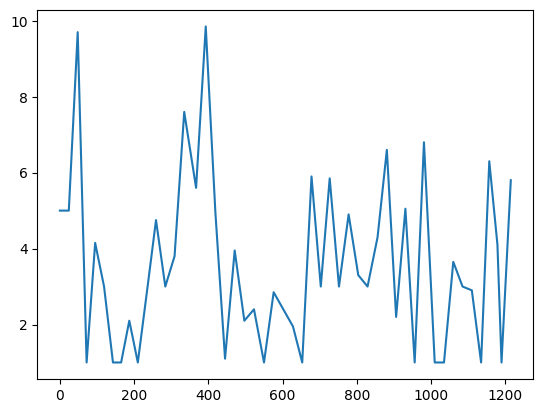

In [5]:
plt.plot(data_s10.index, data_s10['fatigue'])

<BarContainer object of 50 artists>

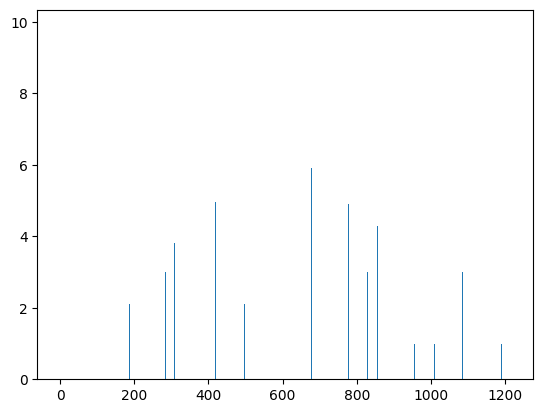

In [6]:
plt.bar(data_s10.index, data_s10['fatigue'])

#### 1.1.2 Bons indexes

In [7]:
data_s10 = data_s10.reset_index(drop=True)

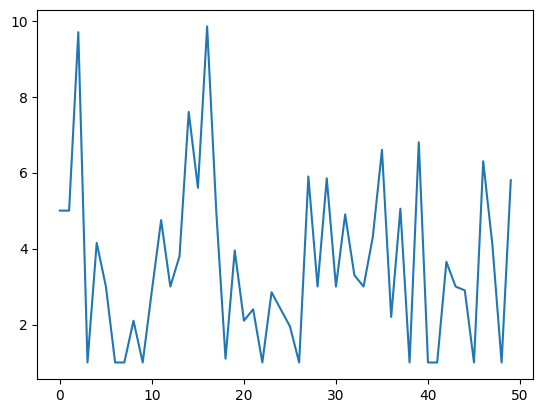

In [8]:
plt.plot(data_s10.index, data_s10['fatigue'])

<BarContainer object of 50 artists>

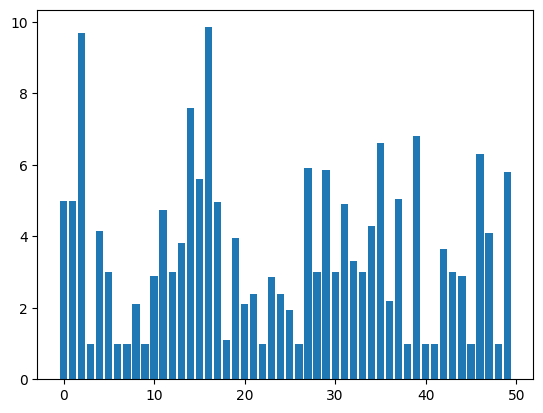

In [9]:
plt.bar(data_s10.index, data_s10['fatigue'])

#### 1.1.3 Plus de graphiques

#### Distribution (histogramme)

(array([12.,  6., 11.,  5.,  6.,  5.,  2.,  1.,  0.,  2.]),
 array([1.   , 1.885, 2.77 , 3.655, 4.54 , 5.425, 6.31 , 7.195, 8.08 ,
        8.965, 9.85 ]),
 <BarContainer object of 10 artists>)

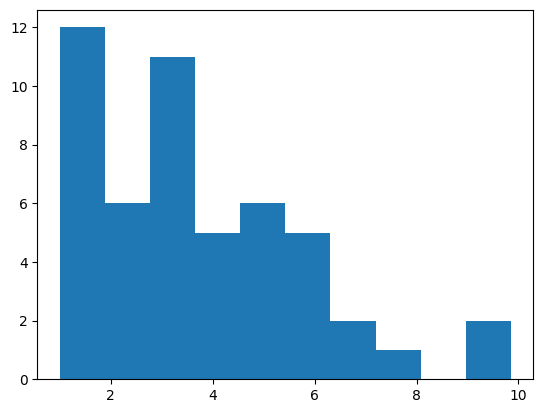

In [10]:
plt.hist(data_s10['fatigue'])

#### Distribution (Boxplot/Boîte à moustaches)

{'whiskers': [<matplotlib.lines.Line2D at 0x2491a088f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2491a0a78b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2491a0a71f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2491a0a7df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2491a0b50d0>],
 'means': []}

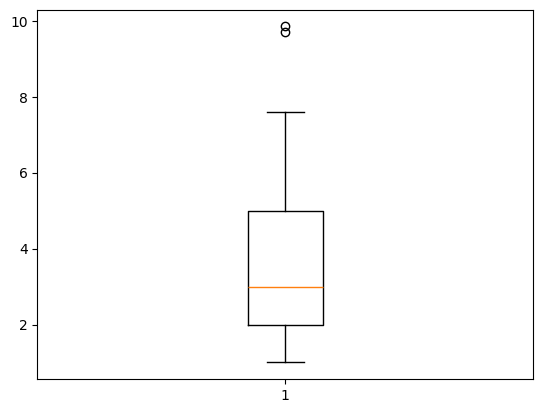

In [11]:
plt.boxplot(data_s10['fatigue'])

#### Relation

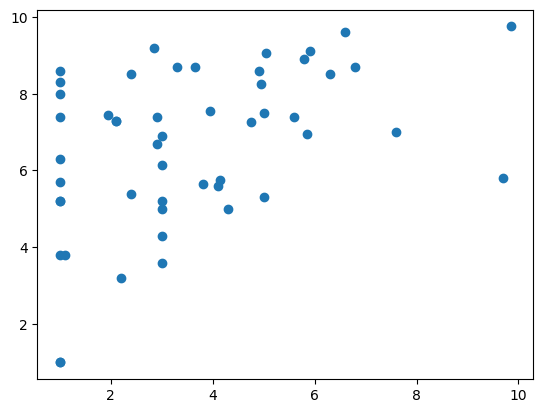

In [12]:
plt.scatter(data_s10['fatigue'], data_s10['intensitemax'])

#### Combinaisons

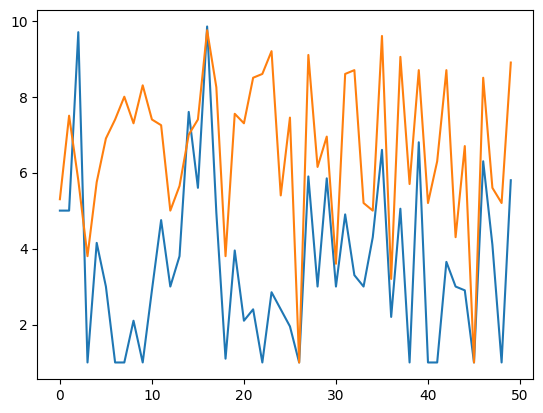

In [13]:
plt.plot(data_s10.index, data_s10['fatigue'])
plt.plot(data_s10.index, data_s10['intensitemax'])

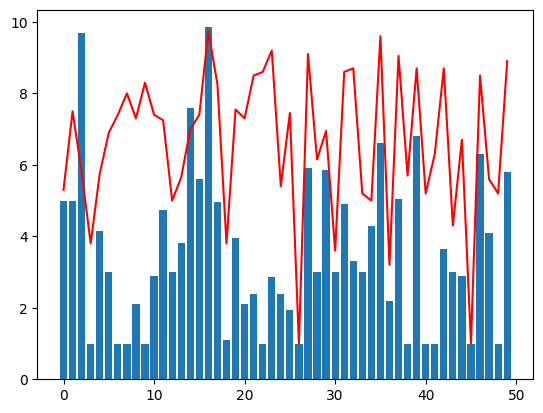

In [14]:
plt.bar(data_s10.index, data_s10['fatigue'])
plt.plot(data_s10.index, data_s10['intensitemax'], color='red')

### 1.2 Visualisation rapide + améliorations

#### 1.2.1 Cycle

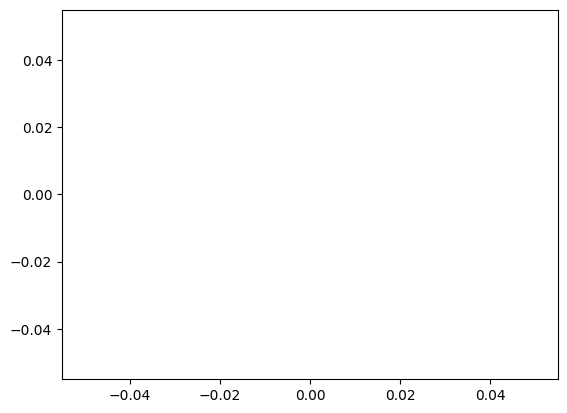

In [15]:
plt.figure()
plt.plot()
plt.show()

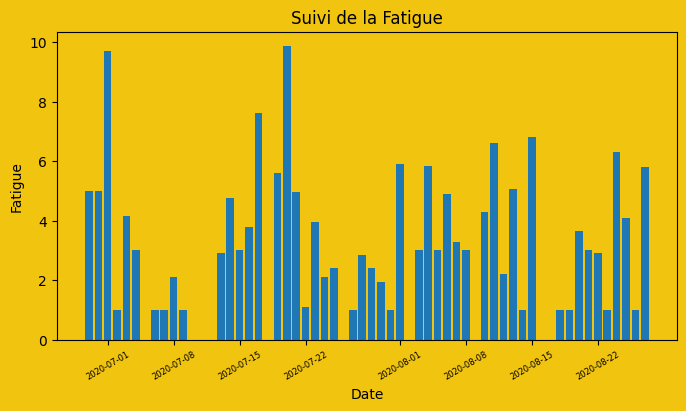

In [16]:
plt.figure(figsize=(8, 4), facecolor='#f1c40f')
# plt.bar(data_s10.index, data_s10['fatigue'])
# plt.xlabel('Index qui pourrait être une date')
plt.bar(data_s10['dateSeance'], data_s10['fatigue'])
plt.xticks(rotation=30, fontsize=6)
plt.xlabel('Date')
plt.ylabel('Fatigue')
plt.title('Suivi de la Fatigue')
plt.gca().set_facecolor('#f1c40f')
plt.show()

#### 1.2.2 Combinaison

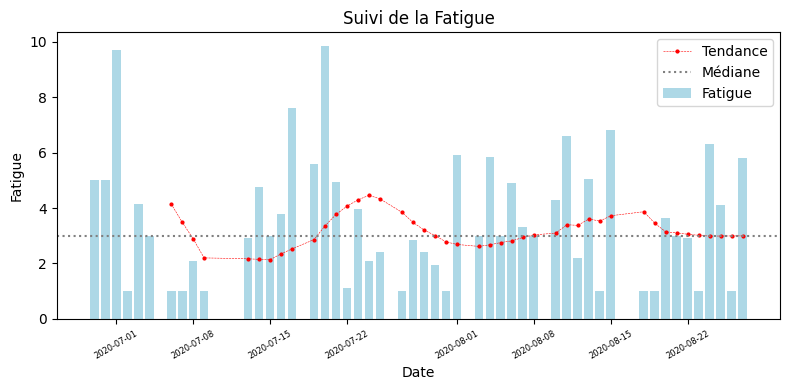

In [17]:
plt.figure(figsize=(8, 4))
plt.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', color='lightblue', width=.8)
plt.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=.4, marker='.', ms=4)
#c: color, ls: linestyle, lw: linewidth, ms: markersize
plt.axhline(np.median(data_s10['fatigue']), label='Médiane', color='grey', ls=':')

# plt.legend(['Fatigue', 'Tendance', 'Médiane'])
plt.legend(loc=0)
plt.xticks(rotation=30, fontsize=6)
plt.xlabel('Date')
plt.ylabel('Fatigue')
plt.title('Suivi de la Fatigue')
plt.tight_layout()
plt.show()

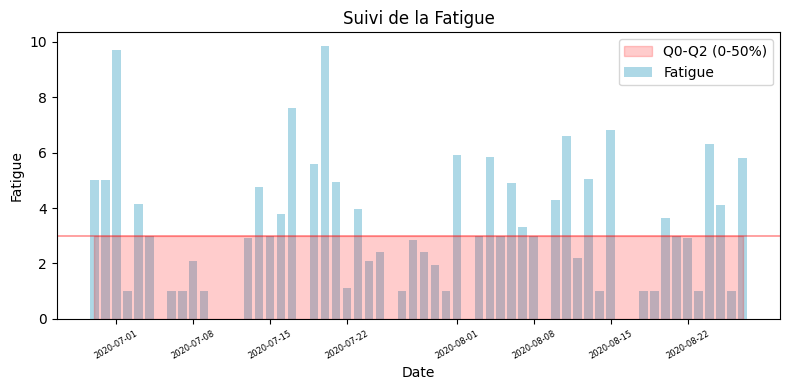

In [18]:
plt.figure(figsize=(8, 4))
plt.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', color='lightblue', width=.8)
plt.axhline(np.median(data_s10['fatigue']), color='red', lw=1.3, alpha=.4)
plt.fill_between(data_s10['dateSeance'], y1=0, y2=np.median(data_s10['fatigue']), alpha=.2, color='red', label='Q0-Q2 (0-50%)')

plt.legend(loc=0)
plt.xticks(rotation=30, fontsize=6)
plt.xlabel('Date')
plt.ylabel('Fatigue')
plt.title('Suivi de la Fatigue')
plt.tight_layout()
plt.show()

#### 1.2.3 Styles

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

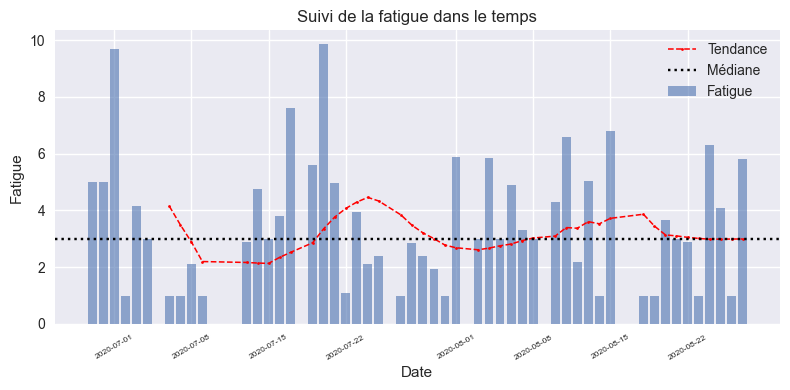

In [20]:
plt.style.use('seaborn-v0_8') #Enregistré une fois executé
#Style par défaut: plt.rcdefaults()

plt.figure(figsize=(8, 4))
plt.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
plt.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
plt.axhline(np.median(data_s10['fatigue']), color='black', ls=':', label='Médiane')
plt.legend(loc=0)
plt.xticks(rotation=30, fontsize=6)
plt.xlabel('Date')
plt.ylabel('Fatigue')
plt.title('Suivi de la fatigue dans le temps')
plt.tight_layout()
plt.show()

#### 1.2.4 Plus de graphiques

#### Relation

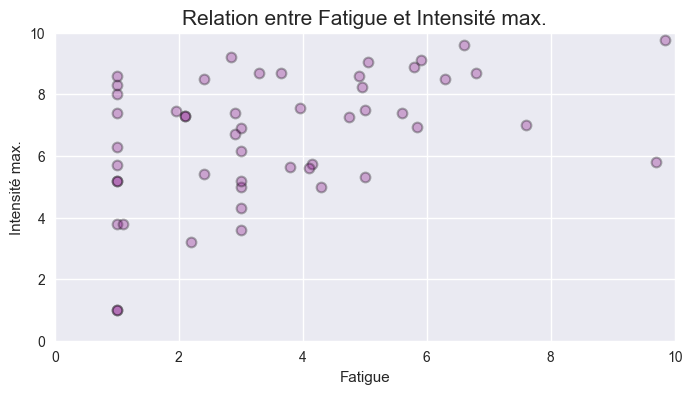

In [21]:
plt.figure(figsize=(8, 4))
plt.scatter(data_s10['fatigue'], data_s10['intensitemax'], color='purple', edgecolor='black', lw=1.5, alpha=.3)
plt.xlim((0, 10))
plt.xlabel('Fatigue')
plt.ylim((0, 10))
plt.ylabel('Intensité max.')
plt.title('Relation entre Fatigue et Intensité max.', fontsize=15)
plt.show()

#### Error bar

In [22]:
from scipy.stats import median_abs_deviation

def MAD(x):
    return median_abs_deviation(x)

In [23]:
data_s10['semaine'] = data_s10['dateSeance'].dt.isocalendar().week
s10_eb = data_s10.groupby('semaine', as_index=False)['fatigue'].agg(['median', MAD])
s10_eb

,semaine,median,MAD
0,27,4.575,1.000
1,28,1.000,0.000
2,29,4.275,1.300
3,30,3.175,1.425
4,31,2.175,0.925
5,32,3.150,0.150
6,33,4.675,2.025
7,34,1.950,0.950
8,35,4.950,1.100


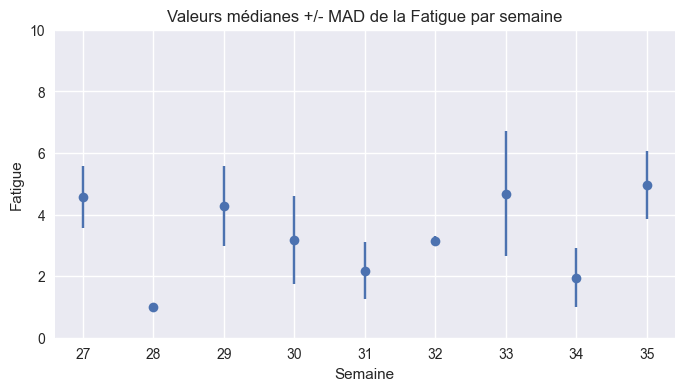

In [24]:
plt.figure(figsize=(8, 4))
plt.errorbar(s10_eb['semaine'], s10_eb['median'], yerr=s10_eb['MAD'], fmt='o')
plt.xlabel('Semaine')
plt.ylim((0, 10))
plt.ylabel('Fatigue')
plt.title('Valeurs médianes +/- MAD de la Fatigue par semaine')
plt.show()

#### Boxplots

In [25]:
bp_wk = [data_s10.loc[data_s10['semaine']==w, 'fatigue'] for w in data_s10['semaine'].unique()]

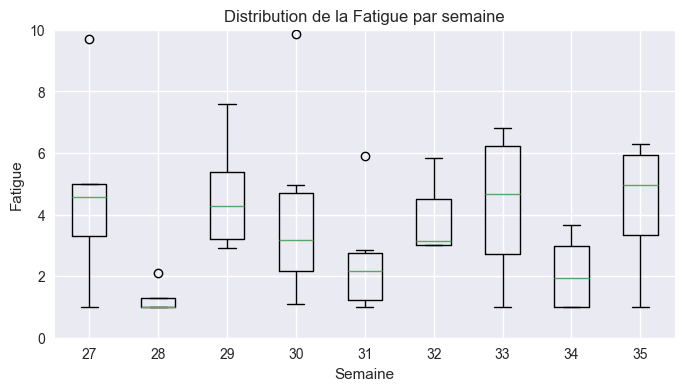

In [26]:
plt.figure(figsize=(8, 4))
plt.boxplot(bp_wk, labels=data_s10['semaine'].unique())
plt.xlabel('Semaine')
plt.ylim((0, 10))
plt.ylabel('Fatigue')
plt.title('Distribution de la Fatigue par semaine')
plt.show()

#### Violin plot

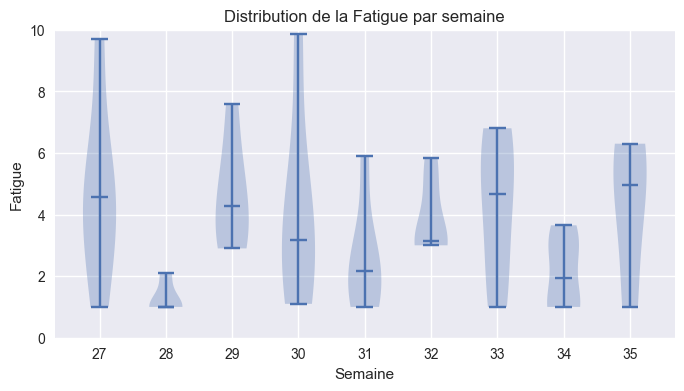

In [27]:
plt.figure(figsize=(8, 4))
plt.violinplot(bp_wk, showmedians=True)
plt.xticks(range(1, len(data_s10['semaine'].unique())+1), data_s10['semaine'].unique())
plt.xlabel('Semaine')
plt.ylim((0, 10))
plt.ylabel('Fatigue')
plt.title('Distribution de la Fatigue par semaine')
plt.show()

#### Area plot

In [28]:
data_gps = pd.read_excel('GPS_tuto_pandas.xlsx')

In [29]:
data_p00 = data_gps[(data_gps['Player Name']=='Player_0')
                    & (data_gps['Period Number']==0)].sort_values(by='Date', ignore_index=True).copy()
data_p00.filter(regex='Dist').columns

Index(['Average Effort Distance', 'Velocity Band 1 Dist',
       'Velocity Band 1 AvgDist', 'Velocity Band 1 PerDist',
       'Velocity Band 2 Dist', 'Velocity Band 2 AvgDist',
       'Velocity Band 2 PerDist', 'Velocity Band 2 MinEffDist',
       'Velocity Band 2 MaxEffDist', 'Velocity Band 2 AvgEffDist',
       ...
       'Avg Poss Dist', 'Velocity Band 1 Dist (Set2)',
       'Velocity Band 2 Dist (Set2)', 'Velocity Band 3 Dist (Set2)',
       'Velocity Band 4 Dist (Set2)', 'Velocity Band 5 Dist (Set2)',
       'Velocity Band 6 Dist (Set2)', 'Velocity Band 7 Dist (Set2)',
       'Velocity Band 8 Dist (Set2)', 'Work Rate Total Dist'],
      dtype='object', length=237)

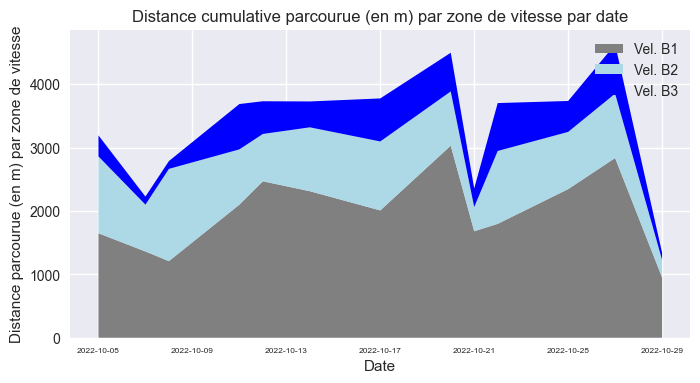

In [30]:
plt.figure(figsize=(8, 4))
plt.stackplot(data_p00['Date'], data_p00['Velocity Band 1 Dist'], data_p00['Velocity Band 2 Dist'],
              data_p00['Velocity Band 3 Dist'],
              labels=['Vel. B1', 'Vel. B2', 'Vel. B3'], colors=['grey', 'lightblue', 'blue'])
plt.legend(loc=0)
plt.xticks(fontsize=6)
plt.xlabel('Date')
plt.ylabel('Distance parcourue (en m) par zone de vitesse')
plt.title('Distance cumulative parcourue (en m) par zone de vitesse par date')
plt.show()

In [31]:
data_p0 = data_gps[(data_gps['Player Name']=='Player_0')
                   & (data_gps['Period Number']!=0)].reset_index(drop=True).copy()
data_p0
data_p0t = data_p0[data_p0['Date']=='2022-10-05'].copy()
data_p0t = data_p0t.drop(index=[1, 7])

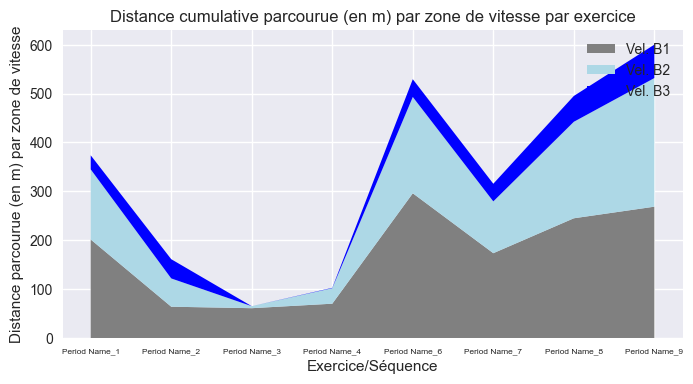

In [32]:
plt.figure(figsize=(8, 4))
plt.stackplot(data_p0t['Period Name'], data_p0t['Velocity Band 1 Dist'], data_p0t['Velocity Band 2 Dist'],
              data_p0t['Velocity Band 3 Dist'],
              labels=['Vel. B1', 'Vel. B2', 'Vel. B3'], colors=['grey', 'lightblue', 'blue'])
plt.legend(loc=0)
plt.xticks(fontsize=6)
plt.xlabel('Exercice/Séquence')
plt.ylabel('Distance parcourue (en m) par zone de vitesse')
plt.title('Distance cumulative parcourue (en m) par zone de vitesse par exercice')
plt.show()

#### Pie plot

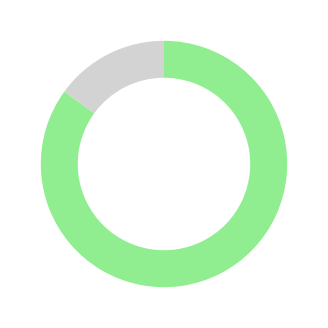

In [33]:
plt.figure(figsize=(4, 4))
plt.pie([85, 15], colors=['lightgreen', 'lightgrey'], counterclock=False, startangle=90,
        wedgeprops=dict(width=.3))
plt.show()

### 1.3 Subplots

#### 1.3.1 Suivis + Distributions

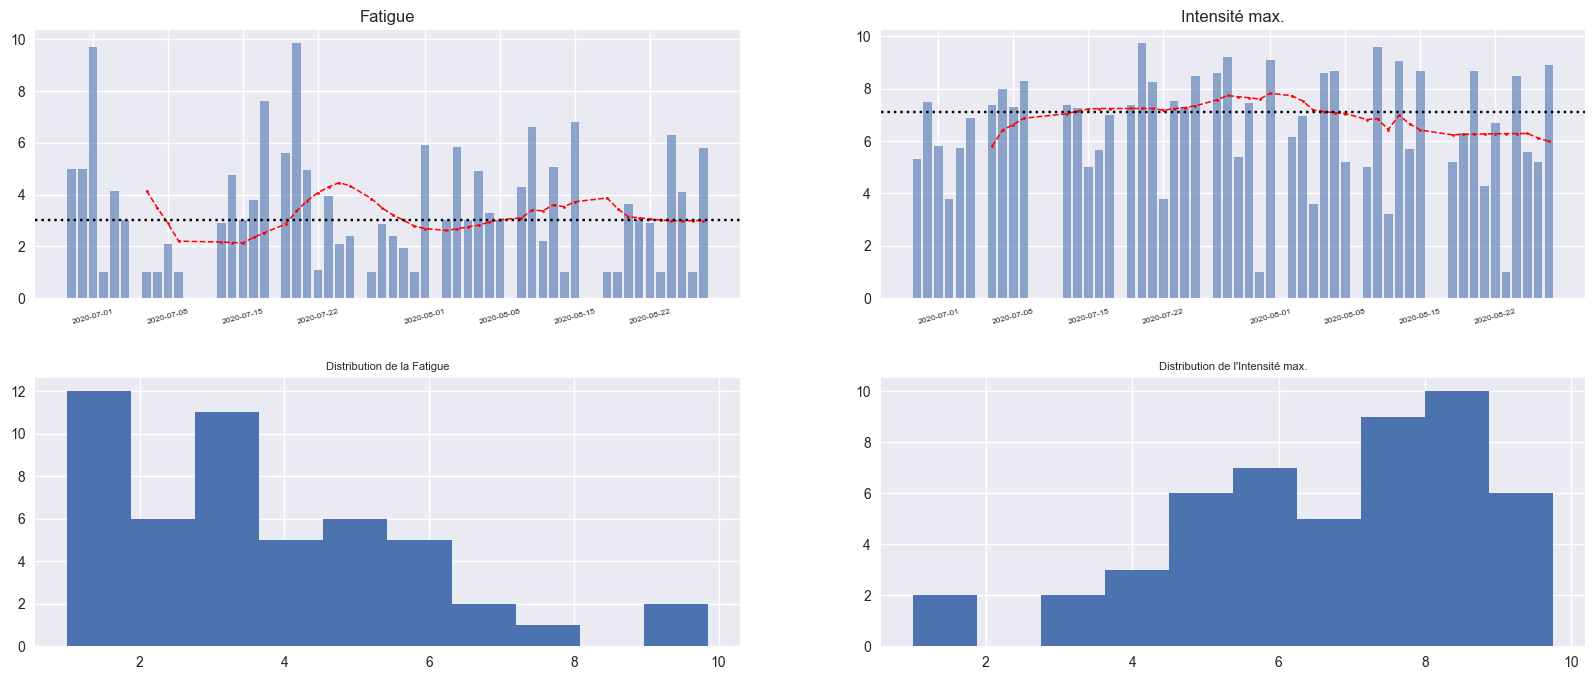

In [34]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
plt.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
plt.axhline(np.median(data_s10['fatigue']), color='black', ls=':', label='Médiane')
plt.xticks(rotation=15, fontsize=6)
plt.title('Fatigue')

plt.subplot(2, 2, 2)
plt.bar(data_s10['dateSeance'], data_s10['intensitemax'], label='Intensité max.', width=.8, alpha=.6)
plt.plot(data_s10['dateSeance'], data_s10['intensitemax_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
plt.axhline(np.median(data_s10['intensitemax']), color='black', ls=':', label='Médiane')
plt.xticks(rotation=15, fontsize=6)
plt.title('Intensité max.')

plt.subplot(2, 2, 3)
plt.hist(data_s10['fatigue'])
plt.title('Distribution de la Fatigue', fontsize=8)

plt.subplot(2, 2, 4)
plt.hist(data_s10['intensitemax'])
plt.title("Distribution de l'Intensité max.", fontsize=8)

plt.subplots_adjust(hspace=.3)
plt.show()

#### 1.3.2 Distributions

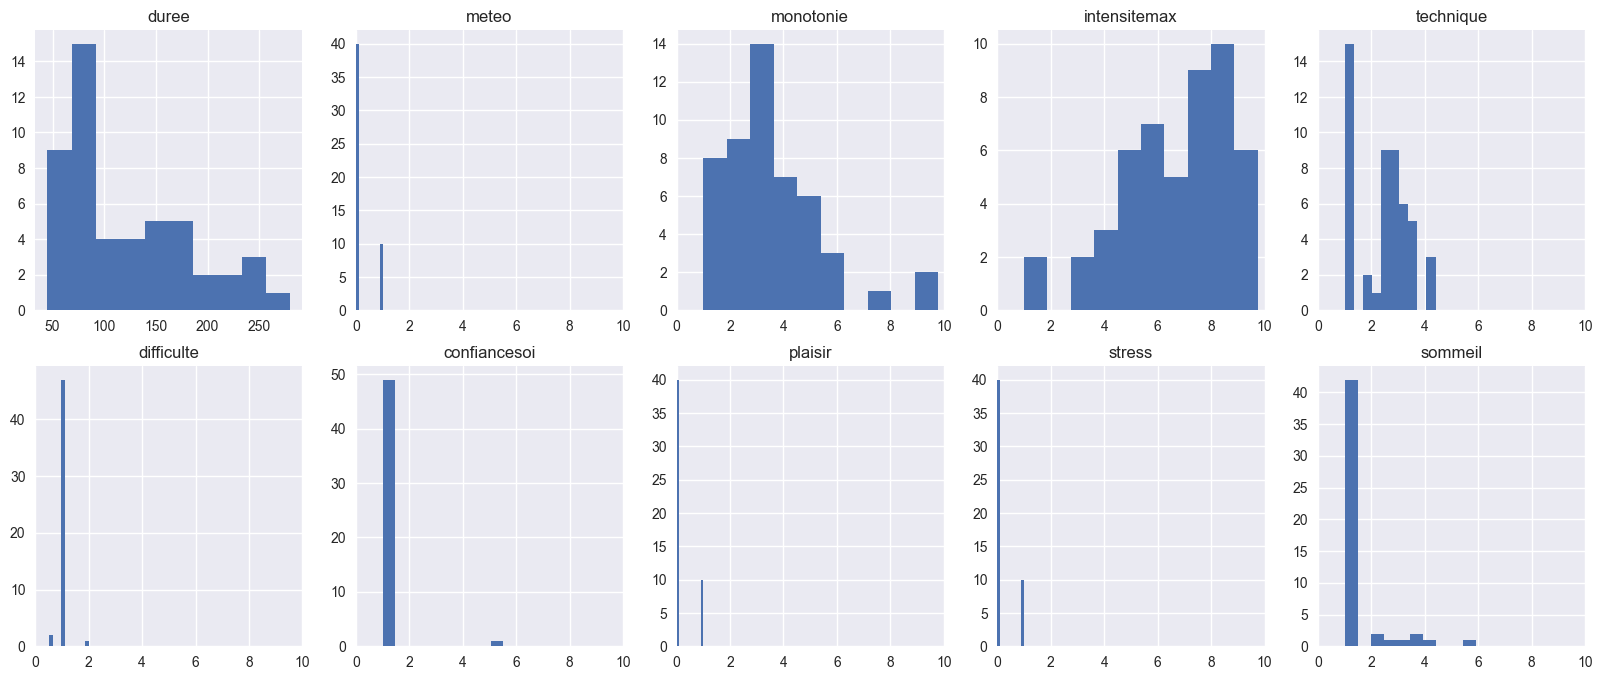

In [35]:
markers_list = ['duree', 'meteo', 'monotonie', 'intensitemax', 'technique',
                'difficulte', 'confiancesoi', 'plaisir', 'stress', 'sommeil']
len(markers_list)

plt.figure(figsize=(20, 8))

for i, m in enumerate(markers_list):
    plt.subplot(2, int(len(markers_list)/2), i+1)
    plt.hist(data_s10[m])
    plt.title(m)
    if m != 'duree':
        plt.xlim((0, 10))

plt.show()

#### Histogramme

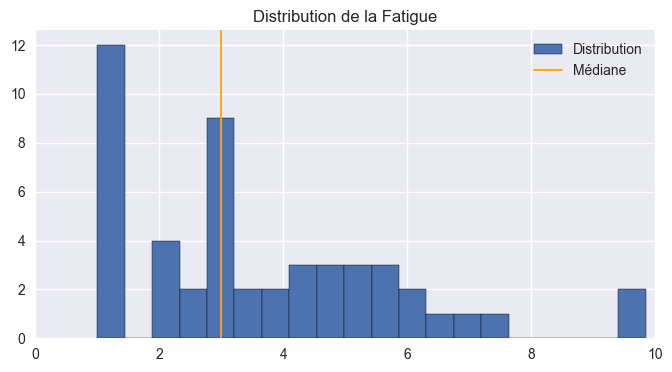

In [36]:
plt.figure(figsize=(8, 4))
plt.hist(data_s10['fatigue'], edgecolor='black', label='Distribution', bins=20)
plt.axvline(np.median(data_s10['fatigue']), color='orange', lw=1.3, label='Médiane')
plt.legend(loc=0)
plt.xlim((0, 10))
plt.title('Distribution de la Fatigue')
plt.show()

#### 1.3.3 Relations

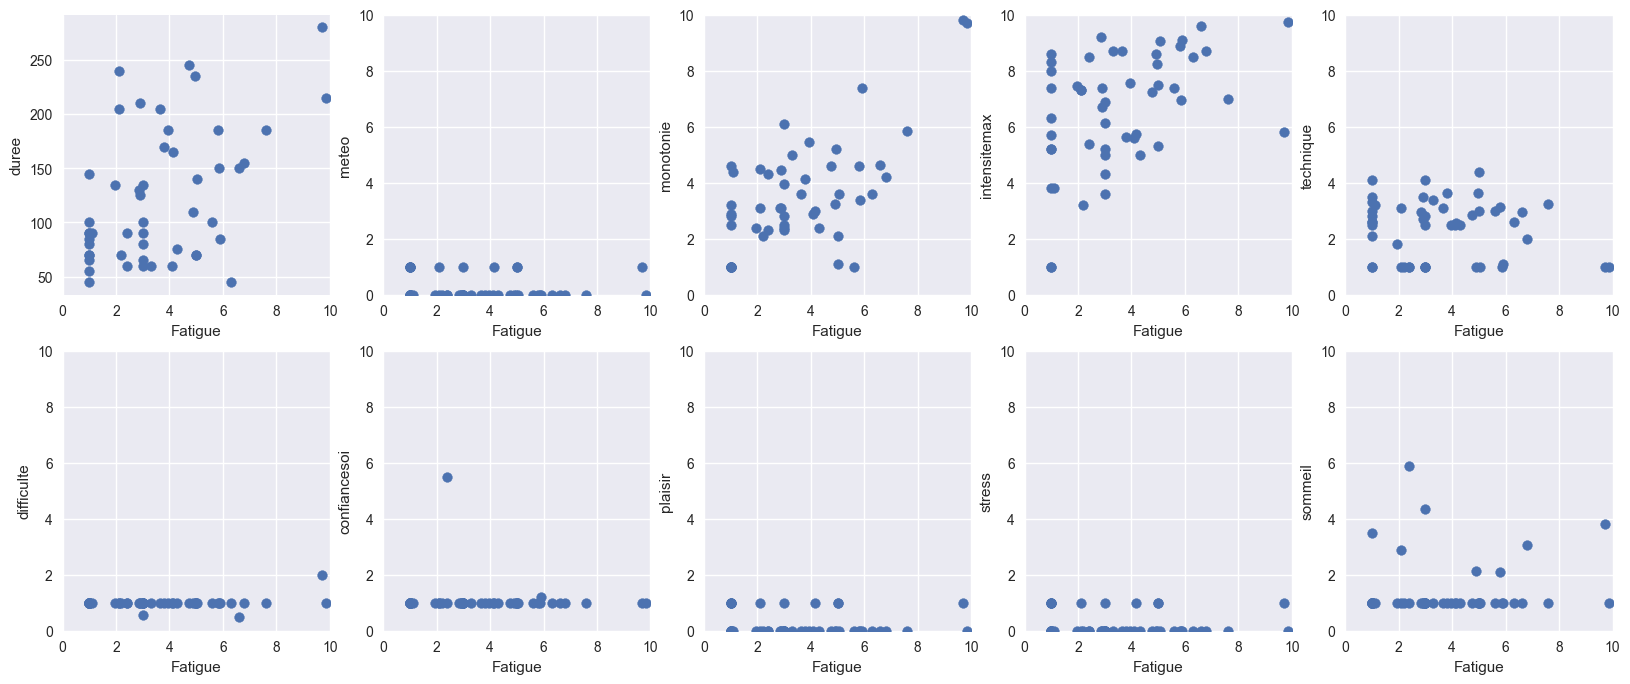

In [37]:
plt.figure(figsize=(20, 8))

for i, m in enumerate(markers_list):
    plt.subplot(2, int(len(markers_list)/2), i+1)
    plt.scatter(data_s10['fatigue'], data_s10[m])
    plt.xlim((0, 10))
    plt.xlabel('Fatigue')
    if m != 'duree':
        plt.ylim((0, 10))
    plt.ylabel(m)

plt.show()

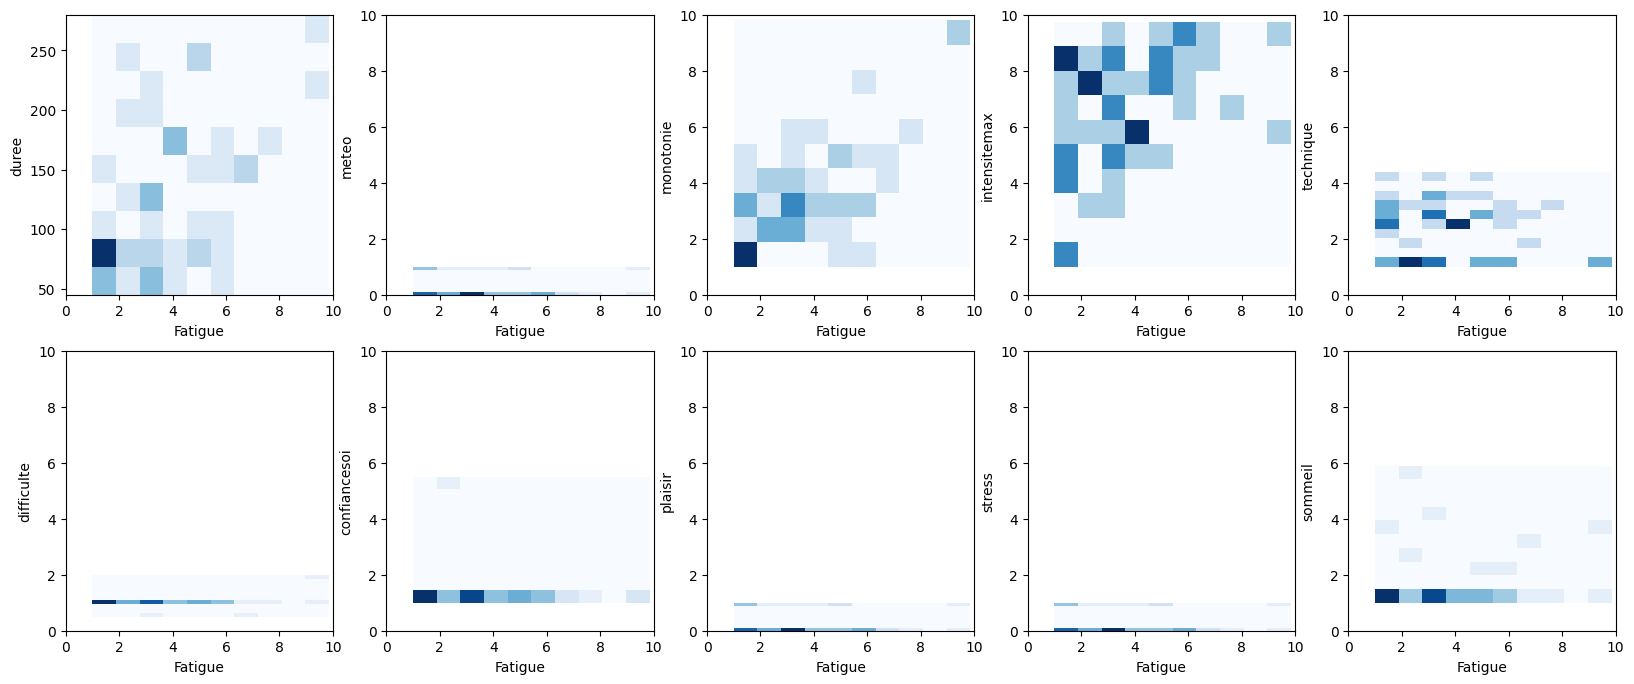

In [38]:
plt.rcdefaults()
plt.figure(figsize=(20, 8))

for i, m in enumerate(markers_list):
    plt.subplot(2, int(len(markers_list)/2), i+1)
    plt.hist2d(data_s10['fatigue'], data_s10[m], cmap='Blues')
    plt.xlim((0, 10))
    plt.xlabel('Fatigue')
    if m != 'duree':
        plt.ylim((0, 10))
    plt.ylabel(m)

plt.show()

# 2. Approche orientée objet

In [39]:
plt.style.use('seaborn-v0_8')

## 2.1 Cycle

In [ ]:
fig, ax = plt.subplots()

plt.show()

C:\Users\raflg\AppData\Local\Temp\ipykernel_12844\691833045.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=6)


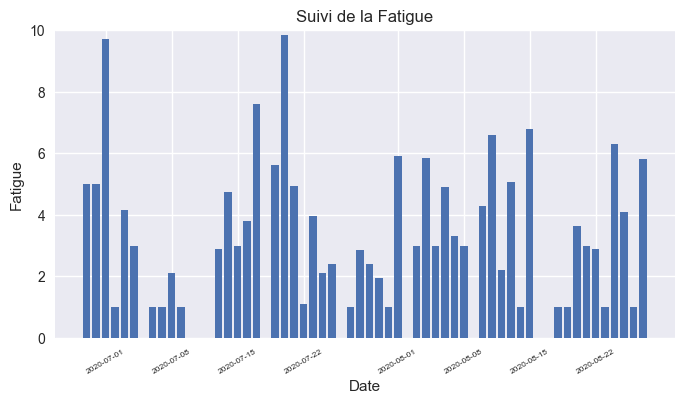

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(data_s10['dateSeance'], data_s10['fatigue'])
ax.set_ylim((0, 10))
ax.set_ylabel('Fatigue')

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=6)
ax.set_xlabel('Date')
ax.set_title('Suivi de la Fatigue')

plt.show()

## 2.2 Subplots

C:\Users\raflg\AppData\Local\Temp\ipykernel_12844\572102197.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, fontsize=6)
C:\Users\raflg\AppData\Local\Temp\ipykernel_12844\572102197.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, fontsize=6)


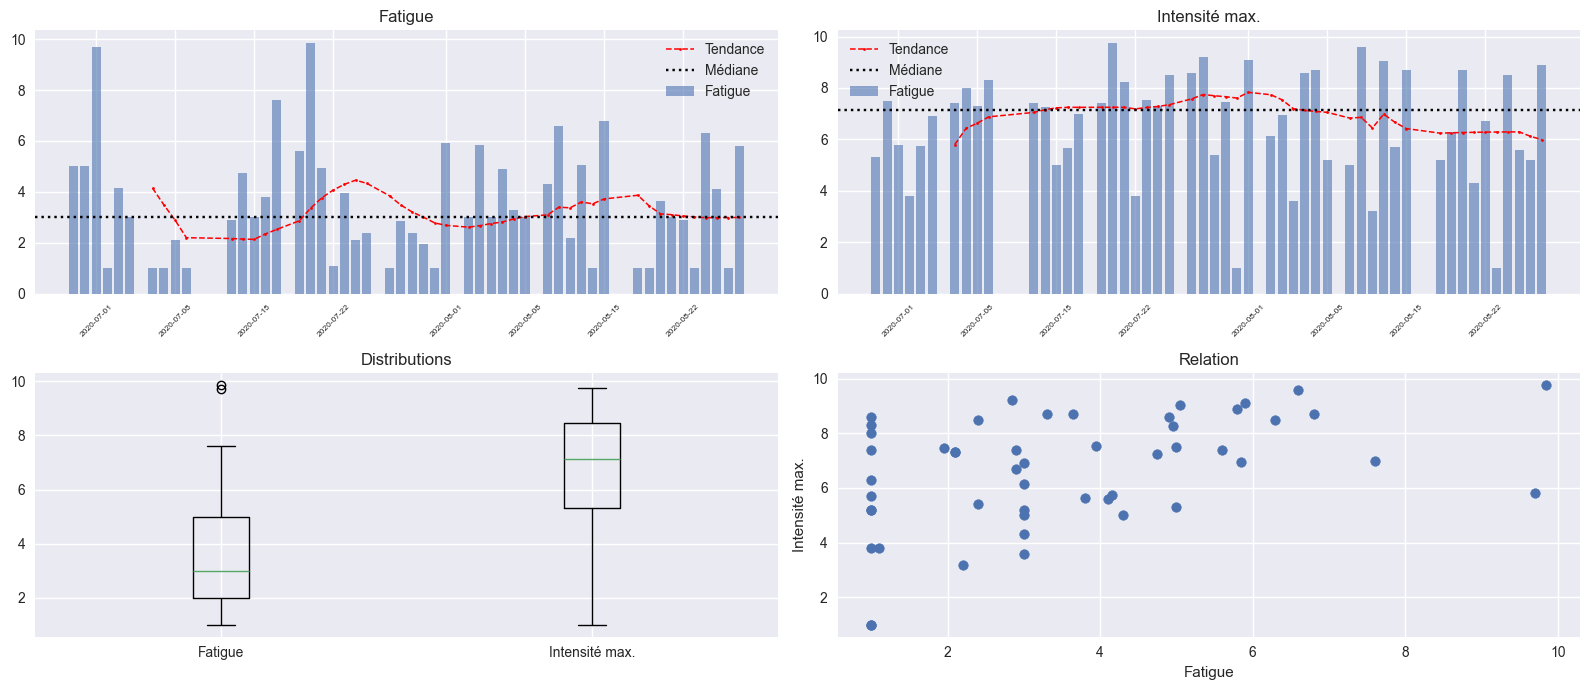

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(16, 7))
# fig, (ax1, ax2, ax3, ax4)

ax[0, 0].bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
ax[0, 0].plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
ax[0, 0].axhline(np.median(data_s10['fatigue']), color='black', ls=':', label='Médiane')
ax[0, 0].legend(loc=0)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, fontsize=6)
ax[0, 0].set_title('Fatigue')

ax[0, 1].bar(data_s10['dateSeance'], data_s10['intensitemax'], label='Fatigue', width=.8, alpha=.6)
ax[0, 1].plot(data_s10['dateSeance'], data_s10['intensitemax_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
ax[0, 1].axhline(np.median(data_s10['intensitemax']), color='black', ls=':', label='Médiane')
ax[0, 1].legend(loc=0)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, fontsize=6)
ax[0, 1].set_title('Intensité max.')

ax[1, 0].boxplot([data_s10['fatigue'], data_s10['intensitemax']], labels=['Fatigue', 'Intensité max.'])
ax[1, 0].set_title('Distributions')

ax[1, 1].scatter(data_s10['fatigue'], data_s10['intensitemax'])
ax[1, 1].set_xlabel('Fatigue')
ax[1, 1].set_ylabel('Intensité max.')
ax[1, 1].set_title('Relation')

plt.tight_layout()
plt.show()

### 2.2.1 Share x and y

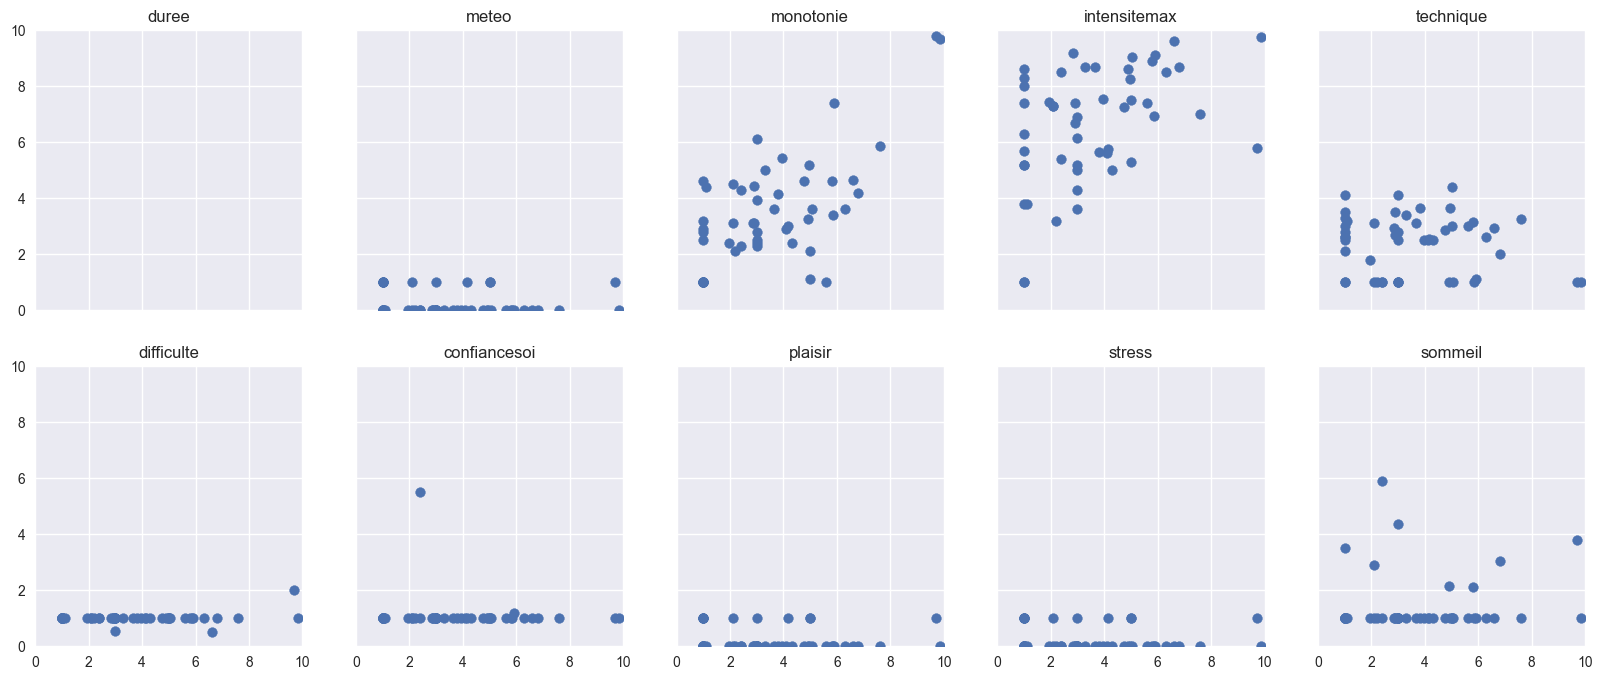

In [ ]:
fig, ax = plt.subplots(2, int(len(markers_list)/2), figsize=(20, 8), sharex=True) #sharey=True
r, c = 0, 0

for m in markers_list:
    ax[r, c].scatter(data_s10['fatigue'], data_s10[m])
    ax[r, c].set_xlim((0, 10))
    if m != 'duree':
        ax[r, c].set_ylim((0, 10))
    ax[r, c].set_title(m)

    if c == 4:
        r += 1
        c = 0
    else:
        c += 1

plt.show()

## 2.3 Derniers

### 2.3.1 Donut chart

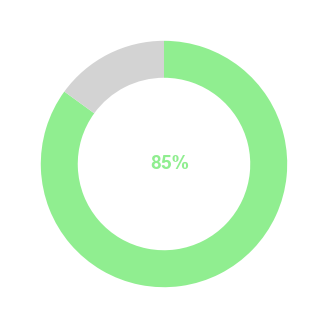

In [57]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie([85, 15], colors=['lightgreen', 'lightgrey'], counterclock=False, startangle=90,
       wedgeprops=dict(width=.3))
ax.text(.05, 0, '85%', ha='center', va='center', fontsize=14, fontweight='bold', color='lightgreen')

plt.show()

### 2.3.2 Zone

C:\Users\raflg\AppData\Local\Temp\ipykernel_12844\533070844.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)


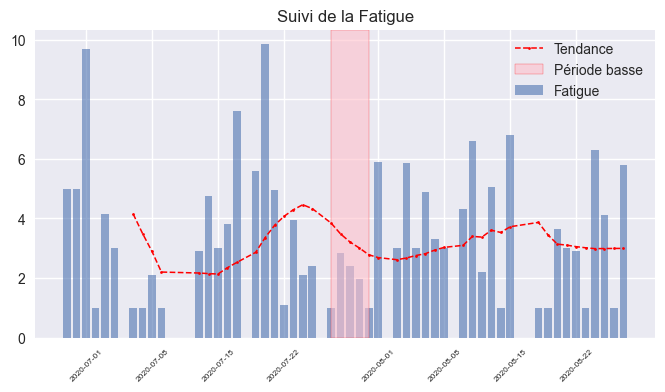

In [59]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
ax.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
ax.axvspan('2020-07-27', '2020-07-31', facecolor='pink', alpha=.6, edgecolor='red', label='Période basse')
ax.legend(loc=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)
ax.set_title('Suivi de la Fatigue')

plt.show()

## 2.4 Améliorations

In [61]:
plt.rcdefaults()

C:\Users\raflg\AppData\Local\Temp\ipykernel_12844\3486952210.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)


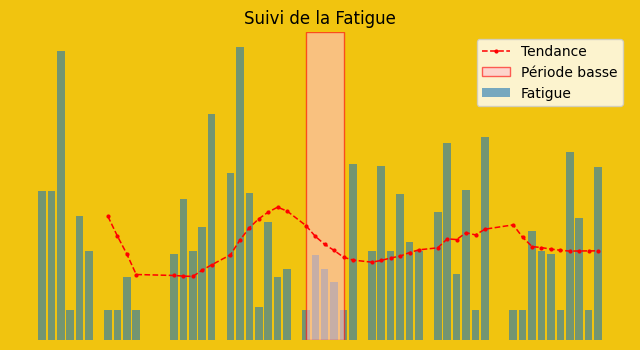

In [74]:
fig, ax = plt.subplots(figsize=(8, 4), facecolor='#f1c40f')

ax.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
ax.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
ax.axvspan('2020-07-27', '2020-07-31', facecolor='pink', alpha=.6, edgecolor='red', label='Période basse')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)
ax.set_title('Suivi de la Fatigue')
ax.legend(loc=0)

ax.set_facecolor('#f1c40f')

# ax.spines['top'].set_visible(False) #bottom left right
# ax.spines[:].set_visible(False)

# ax.tick_params(length=0) #axis='x'/'y'
# ax.set_xticklabels([])
# ax.set_yticklabels([])

ax.set_axis_off()

plt.show()

## 2.5 Enregistrer

In [75]:
plt.style.use('seaborn-v0_8')

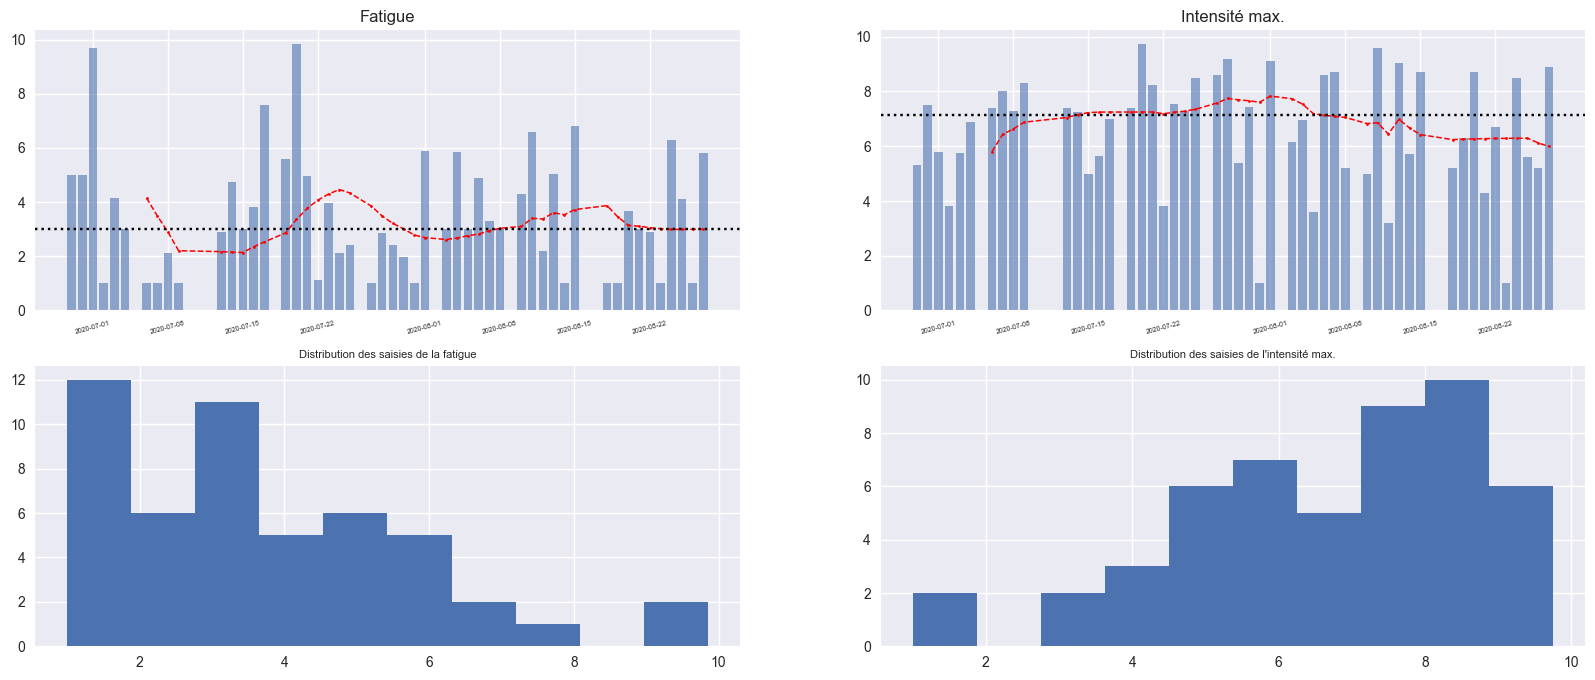

In [78]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
plt.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
plt.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
plt.axhline(np.median(data_s10['fatigue']), color='black', ls=':', label='Médiane')
plt.xticks(rotation=15, fontsize=5)
plt.title('Fatigue')

plt.subplot(2, 2, 2)
plt.bar(data_s10['dateSeance'], data_s10['intensitemax'], label='Fatigue', width=.8, alpha=.6)
plt.plot(data_s10['dateSeance'], data_s10['intensitemax_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
plt.axhline(np.median(data_s10['intensitemax']), color='black', ls=':', label='Médiane')
plt.xticks(rotation=15, fontsize=5)
plt.title('Intensité max.')

plt.subplot(2, 2, 3)
plt.hist(data_s10['fatigue'])
plt.title('Distribution des saisies de la fatigue', fontsize=8)

plt.subplot(2, 2, 4)
plt.hist(data_s10['intensitemax'])
plt.title("Distribution des saisies de l'intensité max.", fontsize=8)

plt.savefig('Rapport Fatigue - Intensité max 11-2024')
plt.savefig('Rapport Fatigue - Intensité max 11-2024_bbox', bbox_inches='tight')
plt.show()

C:\Users\raflg\AppData\Local\Temp\ipykernel_12844\3887903940.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)


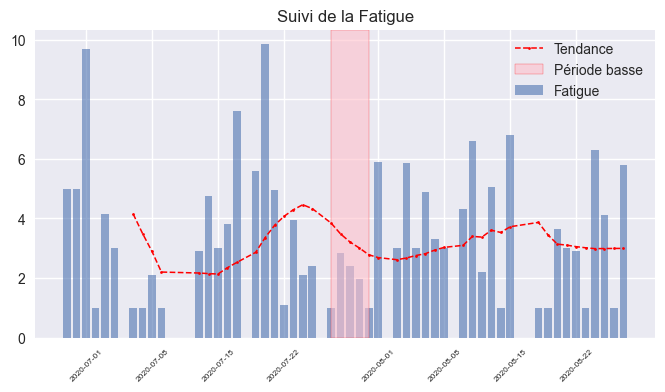

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.bar(data_s10['dateSeance'], data_s10['fatigue'], label='Fatigue', width=.8, alpha=.6)
ax.plot(data_s10['dateSeance'], data_s10['fatigue_tdc'], label='Tendance', c='red', ls='--', lw=1.1, marker='.', ms=4)
ax.axvspan('2020-07-27', '2020-07-31', facecolor='pink', alpha=.6, edgecolor='red', label='Période basse')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)
ax.set_title('Suivi de la Fatigue')
ax.legend(loc=0)

ax.spines[:].set_visible(False)
ax.tick_params(length=0)

plt.show()
fig.savefig('Suivi 11-2024')
fig.savefig('Suivi 11-2024_bbox', bbox_inches='tight')